# Perubahan parameter ukuran matriks filter menjadi 7 x 7:

# LPF

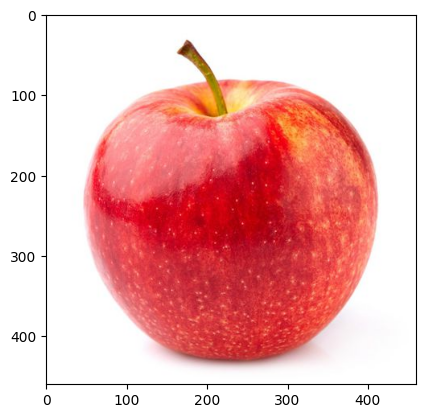

[[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]


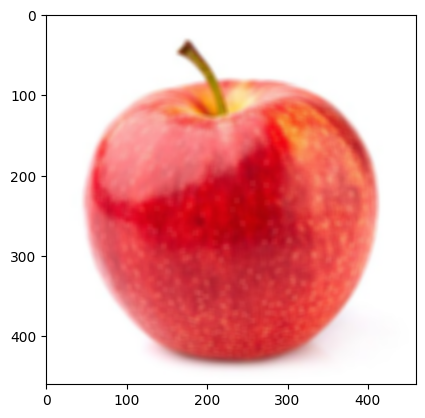

In [1]:
# memanggil modul yang diperlukan
import cv2
import numpy as np
from matplotlib import pyplot as plt

# jika menggunakan Google Colab, jangan lupa load code di bawah ini
# from google.colab.patches import cv2_imshow
# baca gambar
img = cv2.imread('apple.jpg')

# konversi ke ruang warna RGB
cat = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# tampilkan gambar awal tanpa filter
plt.imshow(cat)
plt.show()

# membuat filter: matriks berukuran 5 x 5 
kernel = np.ones((7, 7), np.float32) / 49
print(kernel)

# lakukan filtering
kucing_filter = cv2.filter2D(img, -1, kernel)

kucing_filter_bgr = cv2.cvtColor(kucing_filter, cv2.COLOR_RGB2BGR)
# tampilkan gambar hasil filtering
plt.imshow(kucing_filter_bgr)
plt.show()

# Perubahan parameter ukuran matriks filter menjadi 7 x 7:

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


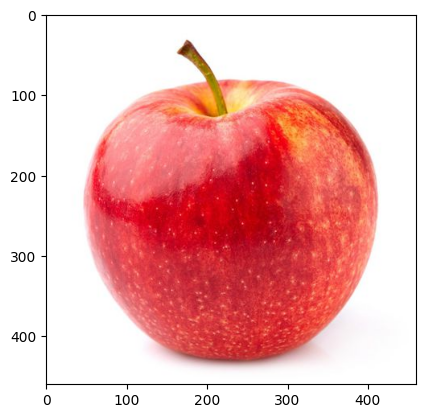

In [4]:
# ini adalah cara lain untuk membuat sebuah kernel, 
# yaitu dengan menggunakan np.matrix
# kali ini, ukuran matriksnya 3 x 3
kernel = np.matrix([
          [0, 0, 0],
          [0, 1, 0],
          [0, 0, 0]
        ], np.float32)
print(kernel)

# buat lagi filteringnya
kucing_filter = cv2.filter2D(img,-1,kernel)

kucing_filter_bgr = cv2.cvtColor(kucing_filter, cv2.COLOR_RGB2BGR)
# tampilkan gambar hasil filtering
plt.imshow(kucing_filter_bgr)
plt.show()

# HPF

# Perubahan parameter nilai 'ksize' pada filter Sobel X dan Sobel Y D:

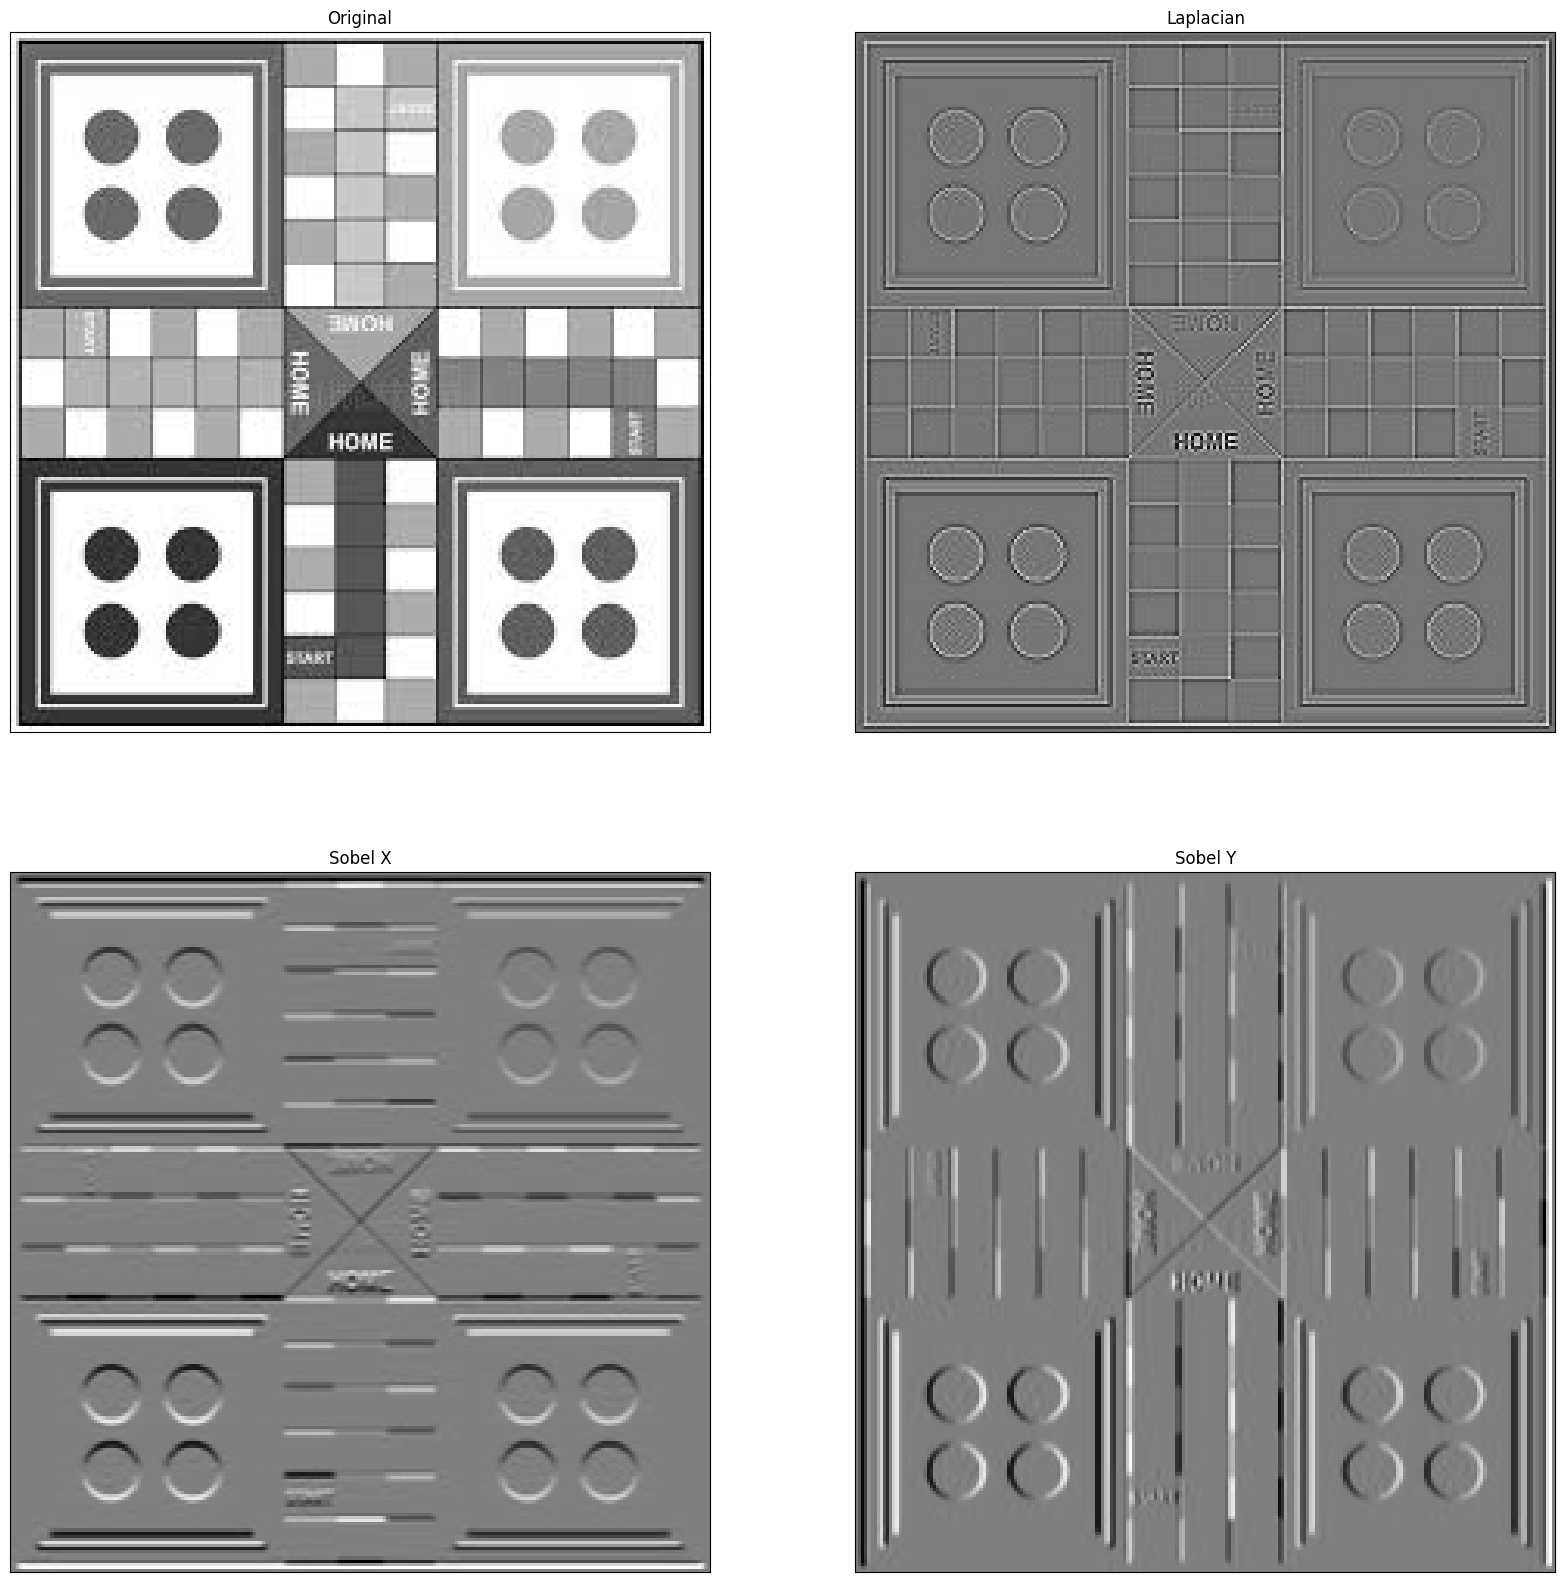

In [5]:
# memanggil citra sebagai grayscale (argument 0)
img = cv2.imread('ludo.jpg',0)

# menerapkan algoritma high-pass filtering:
# laplacian
laplacian = cv2.Laplacian(img,cv2.CV_64F)

# sobel dengan ukuran kernel 5
sobelx = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)

# Catatan:
# CV_64F pada contoh di atas menunjukkan nilai bit dari citra 
# yang dihasilkan serta tipe datanya (F = Float)

# perbesar ukuran hasil plotting 
plt.rcParams["figure.figsize"] = (20,20)


# menampilkan hasil filter
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

# Perubahan parameter nilai '100' dan '200' pada fungsi Canny Edges :

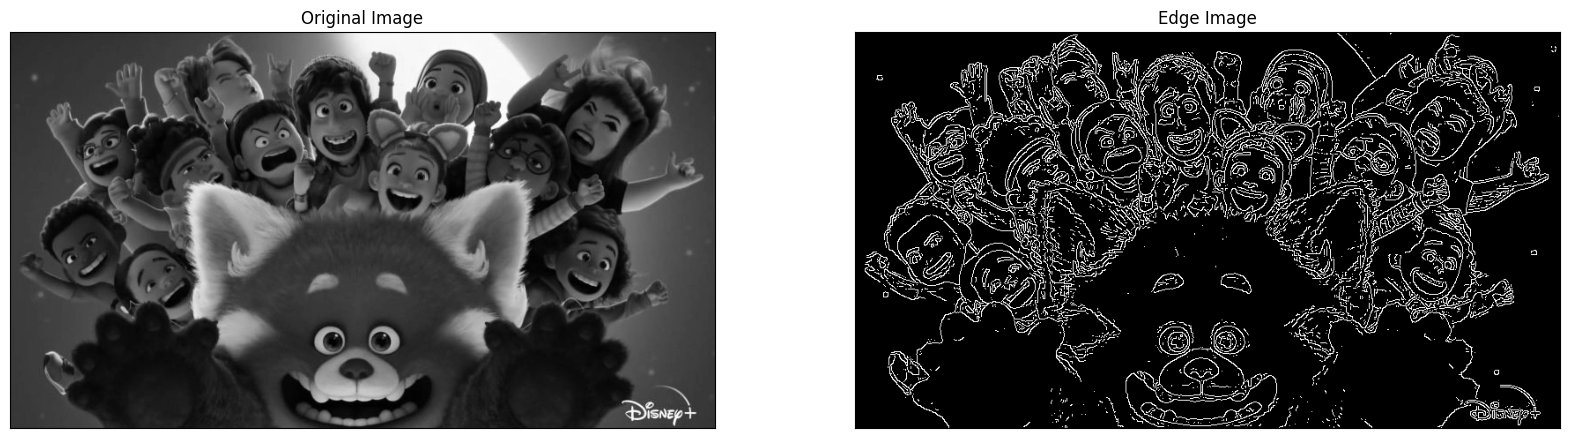

In [6]:
# memanggil citra sebagai grayscale (argument 0)
img = cv2.imread('turningRed.jpg',0)

# memanggil fungsi Canny Edges dengan argument (citra, nilai_min, nilai_max)
edges = cv2.Canny(img, 50, 50)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Image Tresholding

# Perubahan nilai ambang batas bawah dan atas pada semua fungsi threshold :

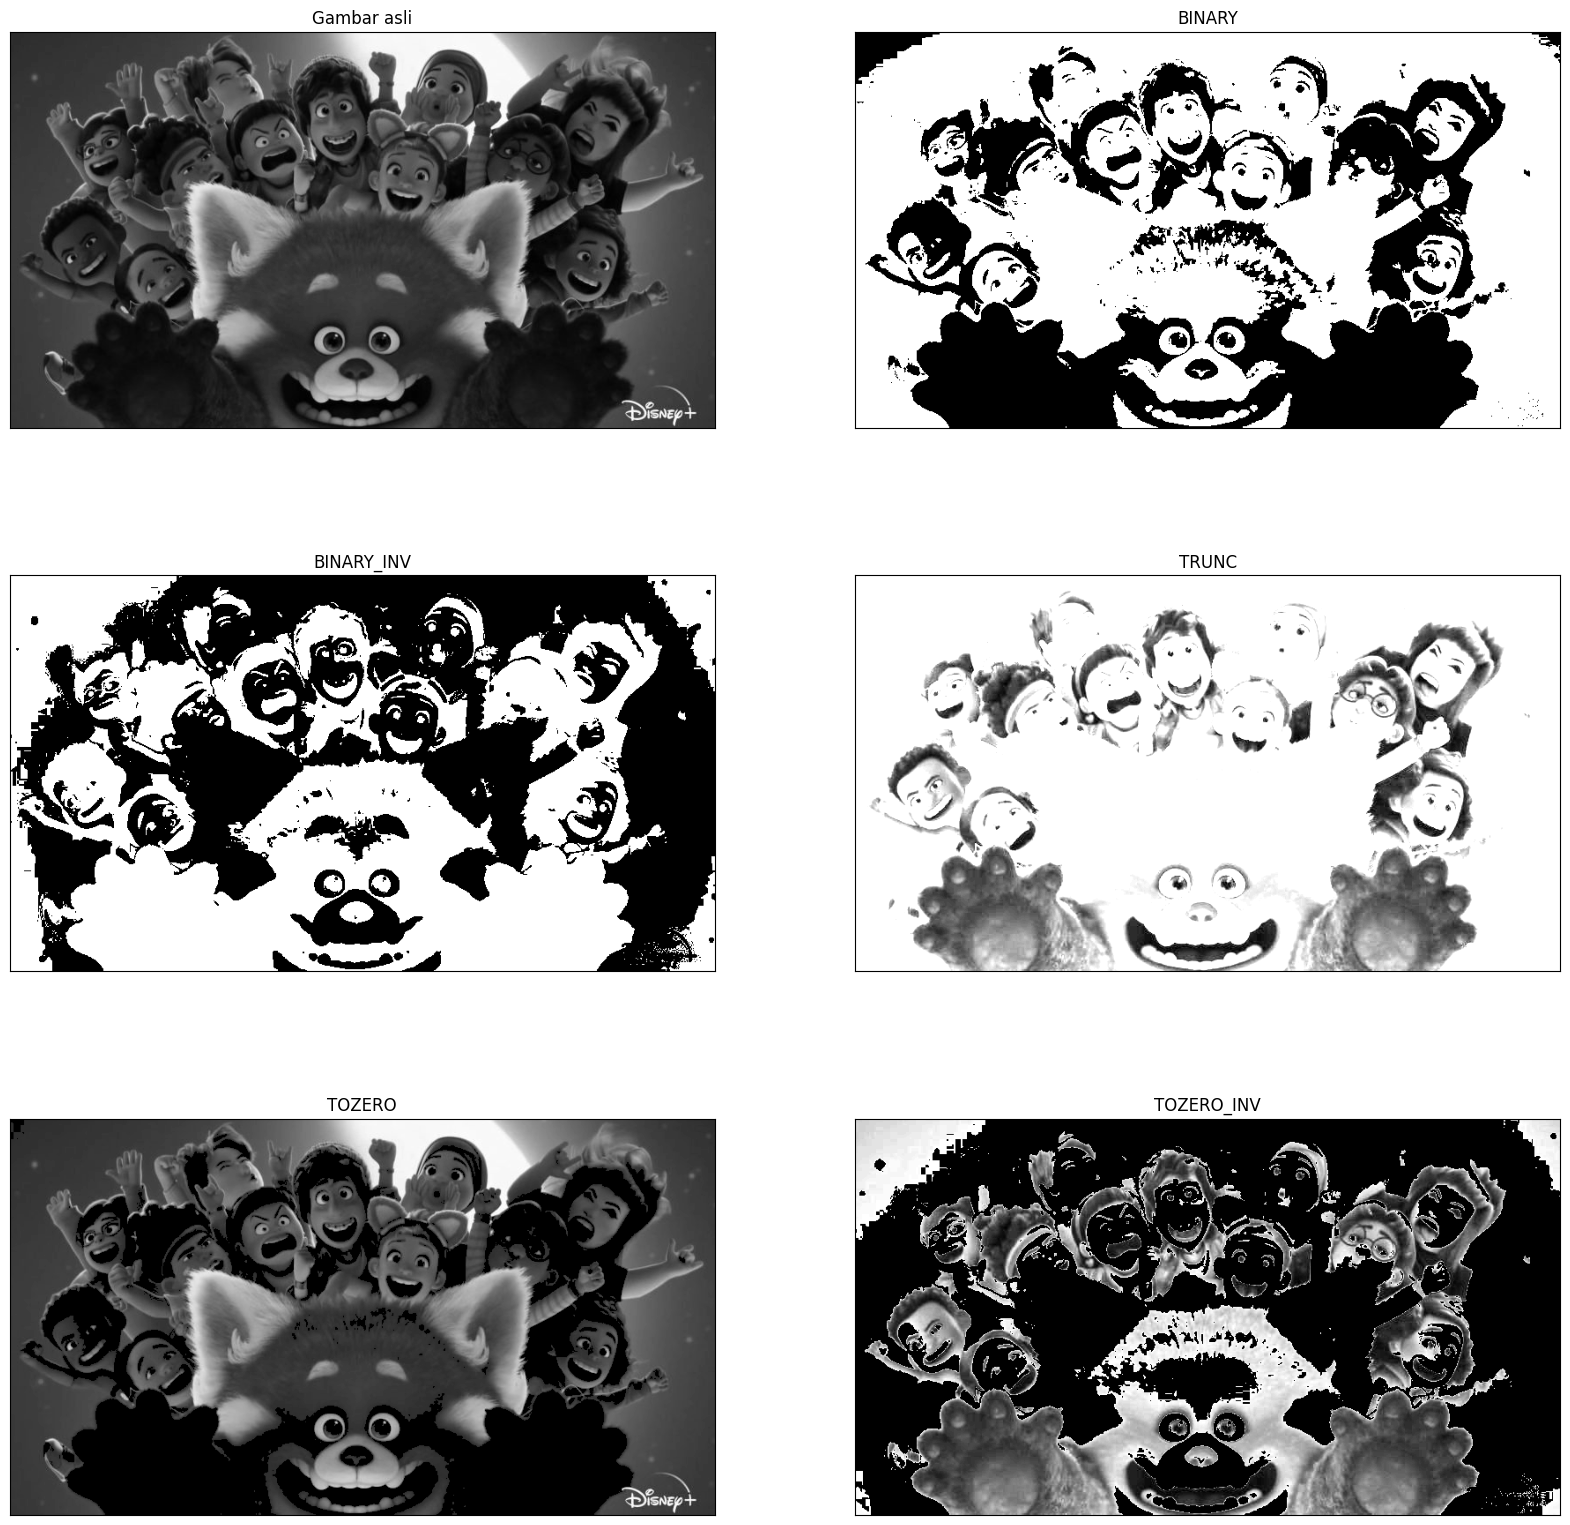

In [7]:
# membaca gambar baymax 
img = cv2.imread('turningRed.jpg',0)

# Hitungan threshold. 
# Perhatikan nilai ambang batas bawah dan atas dari tiap fungsi 
# yang diberikan
ret, thresh1 = cv2.threshold(img, 50, 100, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 60, 110, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 40, 90, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 45, 95, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 55, 105, cv2.THRESH_TOZERO_INV)

# menampilkan hasil
titles = ['Gambar asli','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# menampilkan beberapa gambar sekaligus
for i in range(6):
    # 3 baris, 2 kolom
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()